In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Import the data from medical_examination.csv and assign it to the df variable

In [4]:
df = pd.read_csv("medical_examination.csv")

In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


2.Create the overweight column in the df variable

In [6]:
df['IMC'] = df['weight'] / (df['height'] ** 2)*10000
df['overweight'] = np.where(df['IMC'] > 25, 1, 0)
df["overweight"].value_counts()

overweight
1    43546
0    26454
Name: count, dtype: int64

3.Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [7]:
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, np.where(df["cholesterol"] > 1, 1, df["cholesterol"]))

In [8]:
df["gluc"] = np.where(df["gluc"] == 1, 0, np.where(df["gluc"] > 1, 1, df["gluc"]))

In [9]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


Draw the Categorical Plot 

<function matplotlib.pyplot.show(close=None, block=None)>

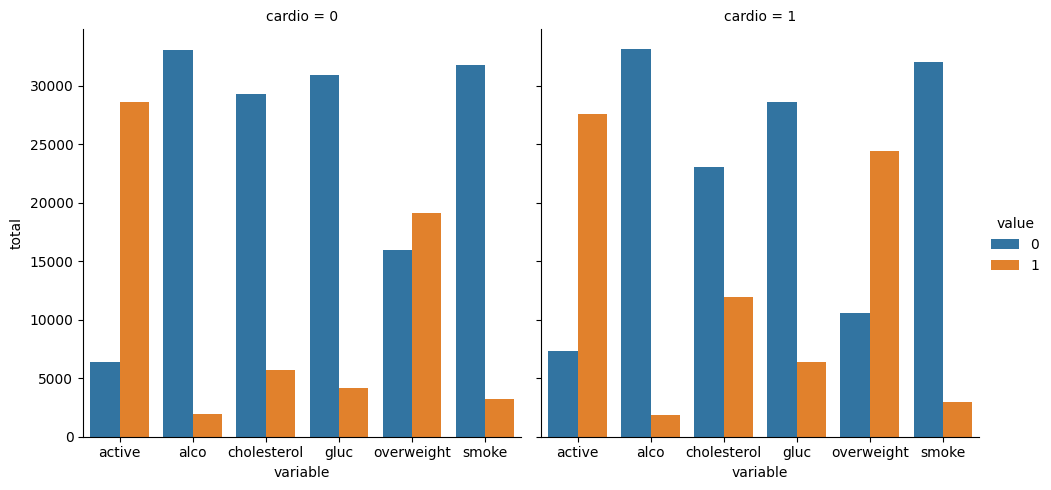

In [10]:
df_cat = sorted(['cholesterol','gluc','smoke','alco','active','overweight'])

df_cat = pd.melt(df, id_vars='cardio', value_vars=df_cat)

sns.catplot(x='variable', col='cardio', hue='value', kind='count', data=df_cat).set_axis_labels('variable', 'total')
plt.show

In [14]:
df_heat = (df['height'] >= df['height'].quantile(0.025)) & \
          (df['height'] <= df['height'].quantile(0.975)) & \
          (df['ap_lo'] <= df['ap_hi']) & \
          (df['weight'] >= df['weight'].quantile(0.025)) & \
          (df['weight'] <= df['weight'].quantile(0.975))

df_filtered = df[df_heat]

In [46]:
corr=df_filtered.corr(method="pearson")
corr
mask=np.triu(corr)

<Axes: >

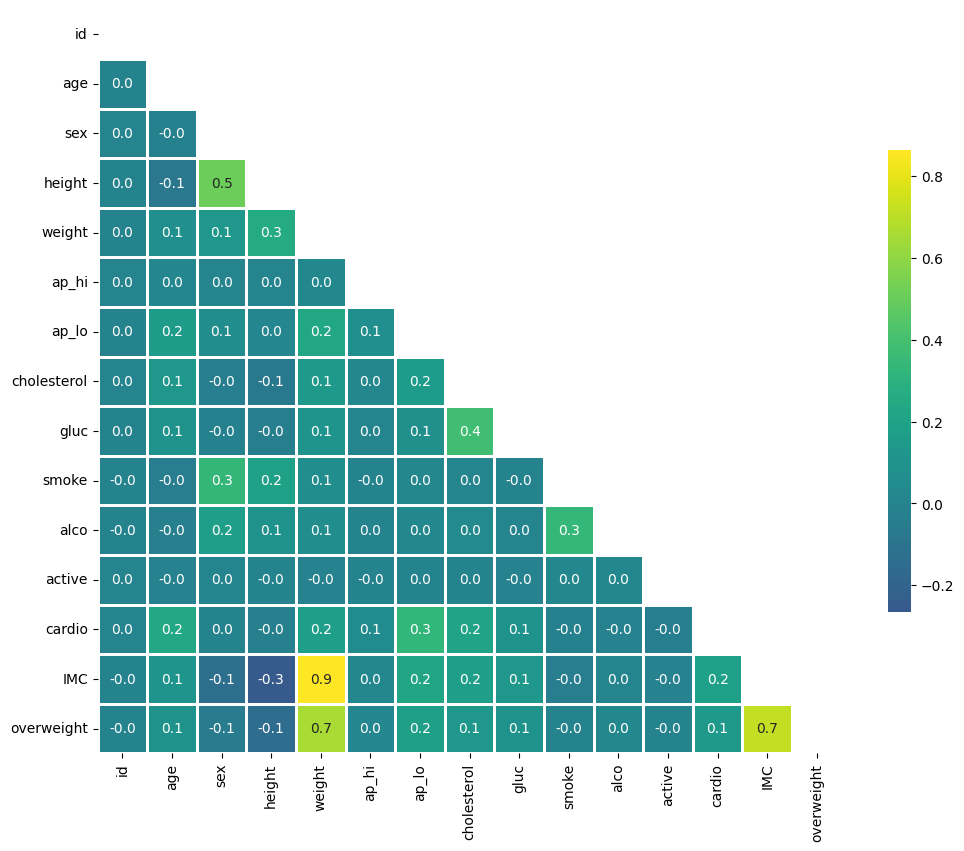

In [47]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, mask=mask,cmap='viridis',linewidths=1,annot=True,square=True,fmt=".1f",center=0.08,cbar_kws = {"shrink":0.5})